<a href="https://colab.research.google.com/github/robert-shepherd/fpl/blob/main/Project_3_7_decision_tree_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision tree model


---

The purpose of this script is to develop the decision tree model

Data sources:
* Data post feature engineering:  https://raw.githubusercontent.com/robert-shepherd/fpl/main/fpl_features.csv


In [ ]:
# Loading libraries
import pandas as pd
import pickle
import numpy as np
import scipy.stats as stats
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Model librariest
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

# Import measures
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Setup

In [ ]:
# Reading in files from static output
X_train_url = 'https://raw.githubusercontent.com/robert-shepherd/fpl/main/X_train.csv'
X_test_url = 'https://raw.githubusercontent.com/robert-shepherd/fpl/main/X_test.csv'
Y_train_url = 'https://raw.githubusercontent.com/robert-shepherd/fpl/main/Y_train.csv'
Y_test_url = 'https://raw.githubusercontent.com/robert-shepherd/fpl/main/Y_test.csv'

X_train = pd.read_csv(X_train_url)
X_test = pd.read_csv(X_test_url)
Y_train = pd.read_csv(Y_train_url,squeeze=True)
Y_test = pd.read_csv(Y_test_url,squeeze=True)

print('X_train      : ',X_train.shape)
print('X_test       : ',X_test.shape)
print('Y_train      : ',Y_train.shape)
print('Y_test       : ',Y_test.shape)

X_train      :  (40388, 40)
X_test       :  (10098, 40)
Y_train      :  (40388,)
Y_test       :  (10098,)


In [ ]:
# Creating a copy with missing values removed
train_na = X_train.isnull().any(axis=1)
test_na = X_test.isnull().any(axis=1)

X_train_no_na = X_train[~train_na]
Y_train_no_na = Y_train[~train_na]

X_test_no_na = X_test[~test_na]
Y_test_no_na = Y_test[~test_na]

print('X_train_no_na      : ',X_train_no_na.shape)
print('X_test_no_na       : ',X_test_no_na.shape)
print('Y_train_no_na      : ',Y_train_no_na.shape)
print('Y_test_no_na       : ',Y_test_no_na.shape)

X_train_no_na      :  (32698, 40)
X_test_no_na       :  (8195, 40)
Y_train_no_na      :  (32698,)
Y_test_no_na       :  (8195,)


## Decision tree model

In [ ]:
# Training decision tree model
dt_model = DecisionTreeRegressor()
dt_model_fitted = dt_model.fit(X_train_no_na,Y_train_no_na)

In [ ]:
# Predicting on test
y_pred_dt = dt_model_fitted.predict(X_test_no_na)

In [ ]:
# Checking min/max prediction
min_pred = min(y_pred_dt)
max_pred = max(y_pred_dt)
print("Min prediction: {}".format(min_pred))
print("Max prediction: {}".format(max_pred))

Min prediction: -4.0
Max prediction: 21.0


## Evaluating bias/variance tradeoff

In [ ]:
# Checking 10 fold cross validation error
MSE_CV_scores = cross_val_score(dt_model, X_train_no_na, Y_train_no_na, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

cv_mse = abs(MSE_CV_scores.mean())

print("CV MSE: {}".format(cv_mse))

CV MSE: 9.606566260946357


In [ ]:
# Checking test MSE
test_mse = mean_squared_error(Y_test_no_na, y_pred_dt)
print("Test MSE: {}".format(test_mse))

Test MSE: 10.126296522269676


In [ ]:
# Checking training MSE
y_pred_dt_train = dt_model_fitted.predict(X_train_no_na)
train_mse = mean_squared_error(Y_train_no_na, y_pred_dt_train)
print("Train MSE: {}".format(train_mse))

Train MSE: 0.0


## Identifying optimum tree depth

In [ ]:
# Identifying optimum tree depth
tree_depths = range(1,20)
cv_r2_mean_scores = []

for i in tree_depths:
  model = DecisionTreeRegressor(max_depth = i)
  R2_CV_scores = cross_val_score(model, X_train_no_na, Y_train_no_na, cv=10, 
                       n_jobs=-1)
  cv_r2 = R2_CV_scores.mean()
  cv_r2_mean_scores.append(cv_r2)

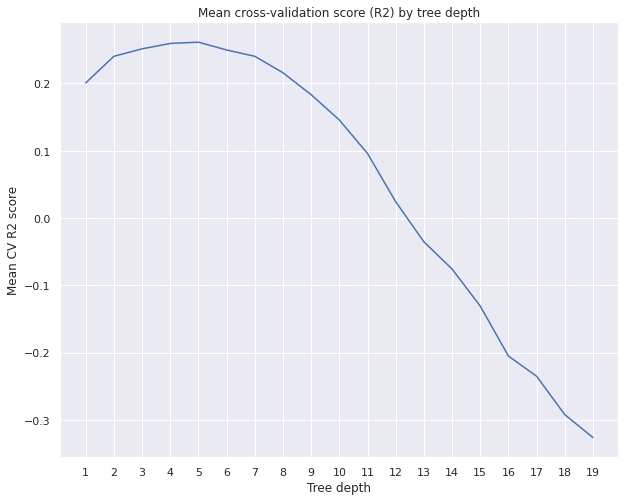

In [ ]:
# Plotting CV performance by depth
sns.set()
plt.figure(figsize=(10,8))
plt.plot(tree_depths,cv_r2_mean_scores)
plt.title('Mean cross-validation score (R2) by tree depth')
plt.xlabel('Tree depth')
plt.ylabel("Mean CV R2 score")
plt.xticks(tree_depths)
plt.show()

In [ ]:
# Find tree depth where CV R2 is highest
max_score = max(cv_r2_mean_scores)

min_index = cv_r2_mean_scores.index(max_score)

tree_depths[min_index]

5

## Updating tree with max depth of 5



In [ ]:
# Training a model with a max depth of 5
dt_model_upd = DecisionTreeRegressor(max_depth = 5)
dt_model_upd_fitted = dt_model_upd.fit(X_train_no_na,Y_train_no_na)

In [ ]:
# Predicting on test
y_pred_dt_upd = dt_model_upd_fitted.predict(X_test_no_na)

In [ ]:
# Checking min/max prediction
min_pred = min(y_pred_dt_upd)
max_pred = max(y_pred_dt_upd)
print("Min prediction: {}".format(min_pred))
print("Max prediction: {}".format(max_pred))

Min prediction: 0.012797881729920565
Max prediction: 7.586956521739131


In [ ]:
# Checking 10 fold cross validation error
MSE_CV_scores = cross_val_score(dt_model_upd, X_train_no_na, Y_train_no_na, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

cv_mse = abs(MSE_CV_scores.mean())

print("CV MSE: {}".format(cv_mse))

CV MSE: 4.816939658503962


In [ ]:
# Checking test MSE
test_mse = mean_squared_error(Y_test_no_na, y_pred_dt_upd)
print("Test MSE: {}".format(test_mse))

Test MSE: 4.860546176281038


In [ ]:
# Checking test R2
r2 = r2_score(Y_test_no_na, y_pred_dt_upd)
print("Test R2: {}".format(r2))

Test R2: 0.23651487097790103


In [ ]:
# Checking training MSE
y_pred_dt_upd_train = dt_model_upd_fitted.predict(X_train_no_na)
train_mse = mean_squared_error(Y_train_no_na, y_pred_dt_upd_train)
print("Train MSE: {}".format(train_mse))

Train MSE: 4.681341687633957


## Understanding the tree and feature importance

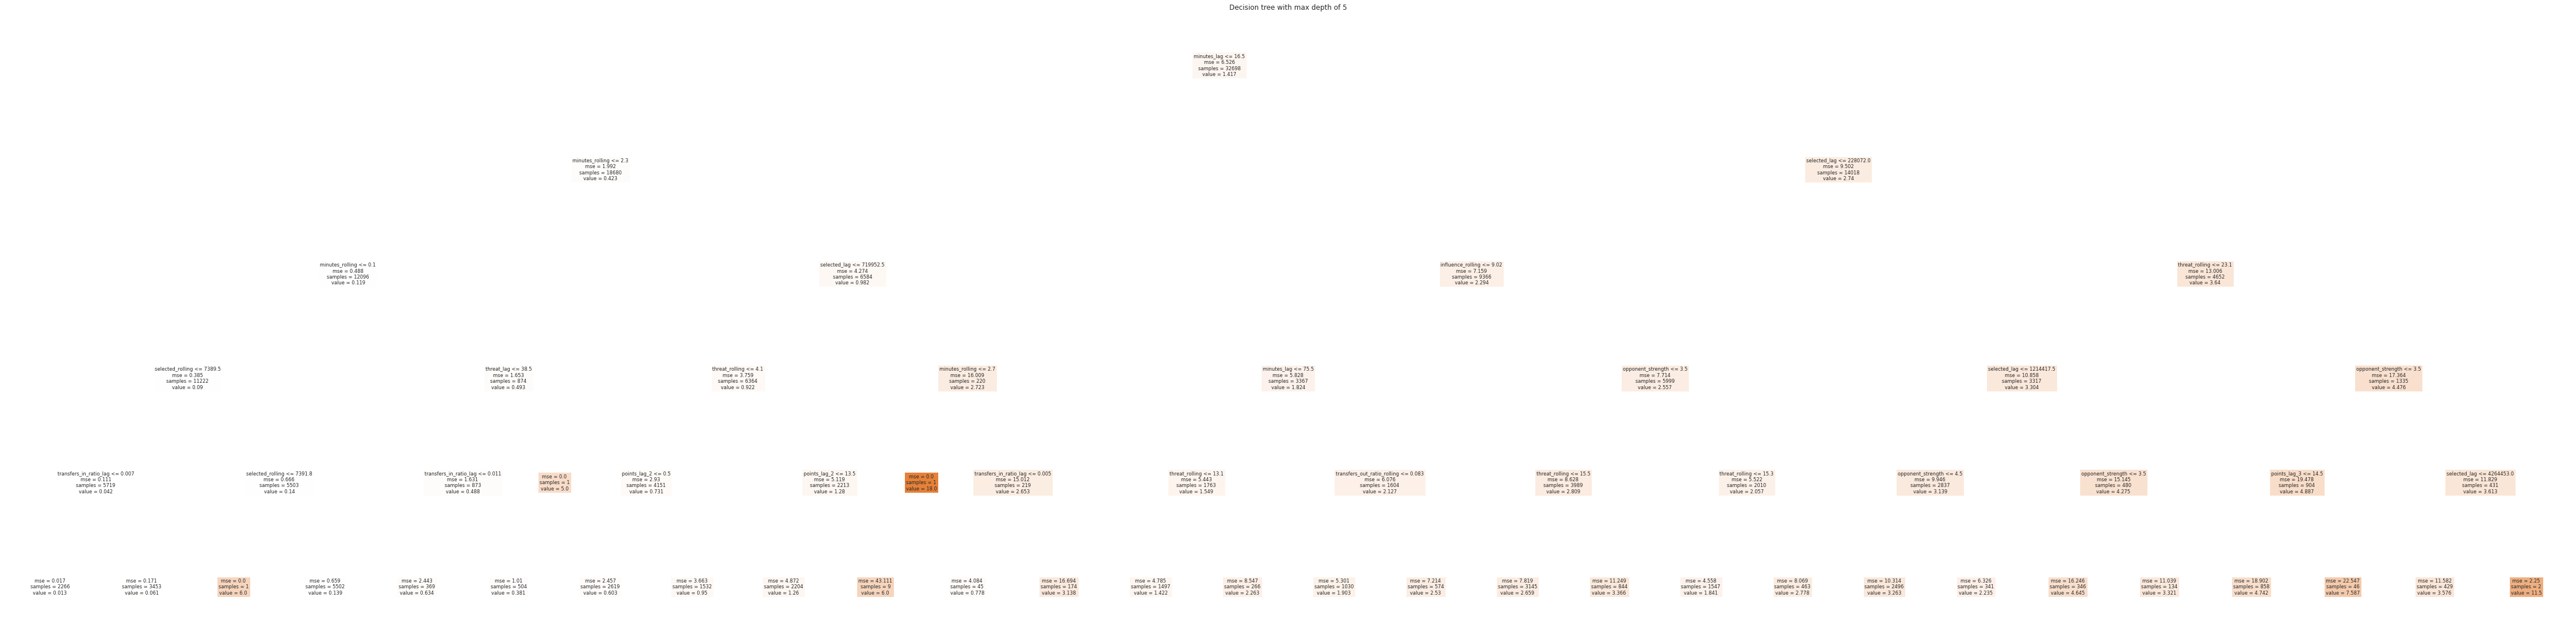

In [ ]:
# Plotting decision tree
feature_names = X_train_no_na.columns
plt.figure(figsize=(80,20))
tree.plot_tree(dt_model_upd_fitted, feature_names=feature_names, filled=True)
plt.title("Decision tree with max depth of 5")
plt.show()

In [ ]:
# Checking feature importance
df_columns = X_train_no_na.columns
feature_importance = dt_model_upd_fitted.feature_importances_

feature_df = pd.DataFrame(df_columns,columns=['feature'])
feature_df['feature_importance'] = feature_importance

feature_df[feature_importance > 0].sort_values(by=['feature_importance'],ascending=False)

,feature,feature_importance
6,minutes_lag,0.717352
30,selected_lag,0.115673
7,minutes_rolling,0.058658
29,threat_rolling,0.042220
0,opponent_strength,0.028460
25,influence_rolling,0.019179
3,points_lag_3,0.005856
2,points_lag_2,0.005265
32,transfers_in_ratio_lag,0.003580
35,transfers_out_ratio_rolling,0.002400


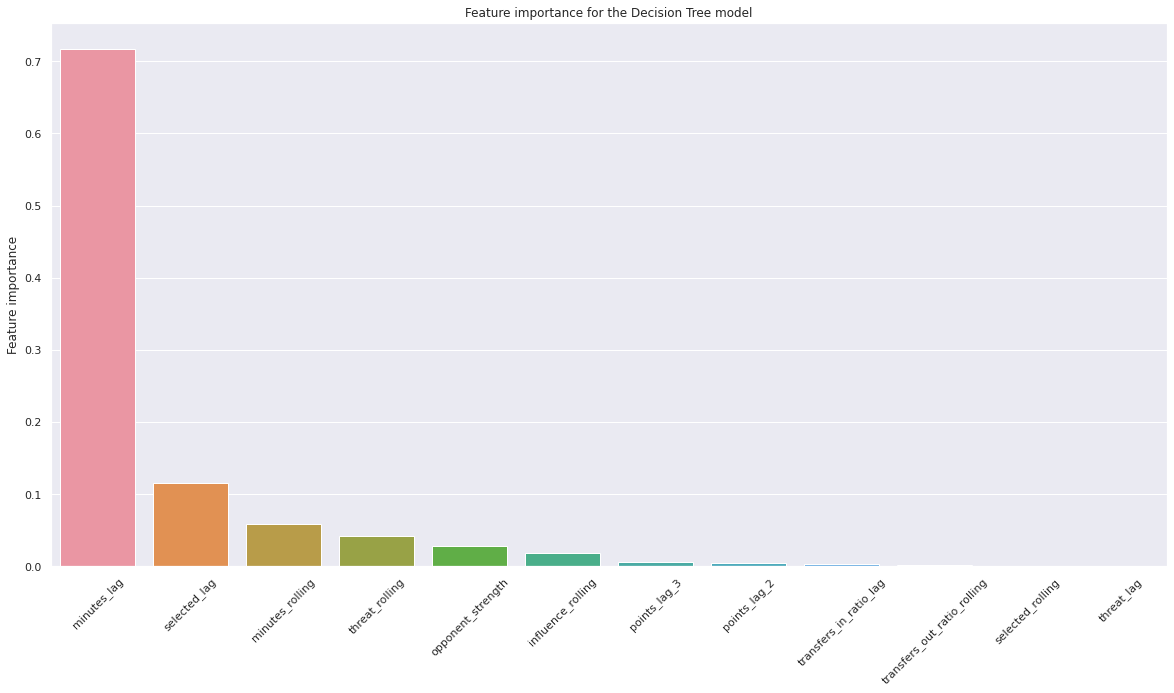

In [ ]:
# Plotting features
significant_features = feature_df[feature_importance > 0].sort_values(by=['feature_importance'],ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(x="feature", y="feature_importance", data=significant_features)
plt.title("Feature importance for the Decision Tree model")
plt.xlabel("")
plt.ylabel("Feature importance")
plt.xticks(rotation=45)
plt.show()